**Summarize the lecture from [Fast Campus](https://fastcampus.co.kr/courses/201083/clips/) Deep Learning Class.**

### Multi Class Classification

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

### Sigmoid

$sigmoid(x) = \frac{1}{1 + e^{-x}}$

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### Softmax

$softmax(x)_i = \frac{e^{x_i}}{\sum e^{x_j}}$

In [19]:
def softmax(x):
    e_x = np.exp(x)
    return e_x / np.sum(e_x)

### Define network architecture

In [20]:
class ShallowNN:
    def __init__(self, num_input, num_hidden, num_output):
        self.W_h = np.zeros((num_hidden, num_input), dtype=np.float32)
        self.b_h = np.zeros((num_hidden, ), dtype=np.float32)
        self.W_o = np.zeros((num_output, num_hidden), dtype=np.float32)
        self.b_o = np.zeros((num_output, ), dtype=np.float32)
    
    def __call__(self, x):
        h = sigmoid(np.matmul(self.W_h, x) + self.b_h)
        return softmax(np.matmul(self.W_o, h) + self.b_o)

### Load Dataset
> dataset from fast campus

In [21]:
dataset = np.load('./dataset/ch2_dataset.npz')
inputs = dataset['inputs']
labels = dataset['labels']

### Create Model

In [22]:
inputs.shape

(1000, 2)

In [23]:
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [24]:
model = ShallowNN(2, 128, 10)

### Call Weight

In [25]:
weights = np.load("./dataset/ch2_parameters.npz")
model.W_h = weights['W_h']
model.b_h = weights['b_h']
model.W_o = weights['W_o']
model.b_o = weights['b_o']

### Print Result

In [28]:
outputs = list()
for ipt, label in zip(inputs, labels):
    output = model(ipt)
    outputs.append(np.argmax(output))
    print(np.argmax(output), label)
outputs = np.stack(outputs, axis=0)

0 0
0 0
2 0
0 0
1 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
2 0
3 0
0 0
0 0
2 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
0 0
2 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
6 0
0 0
0 0
0 0
0 0
0 0
6 0
0 0
0 0
0 0
3 0
0 0
0 0
0 0
3 0
0 0
0 0
0 0
0 0
0 0
0 0
6 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
9 0
0 0
2 0
6 0
0 0
0 0
0 0
0 0
3 0
0 0
0 0
2 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
9 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
1 1
5 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
5 1
1 1
1 1
2 1
1 1
0 1
1 1
1 1
1 1
1 1
5 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
2 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
2 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
2 2
0 2
0 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
3 2
2 2
2 2
2 2
2 2
3 2
2 2
2 2
2 2
2 2
0 2
1 2
0 2
0 2
2 2
2 2
0 2
2 2
2 2
0 2
0 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 2
2 2
2 2


### Visualization

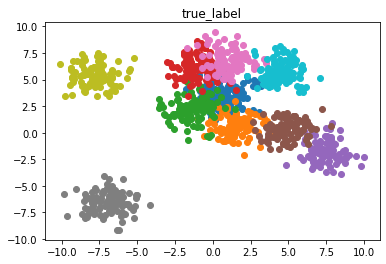

In [32]:
# True output
plt.figure()
for i in range(10):
    mask = labels == i
    plt.scatter(inputs[mask, 0], inputs[mask, 1])
plt.title('true_label')
plt.show()

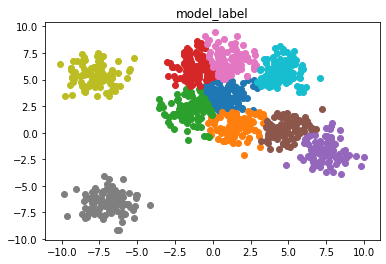

In [33]:
# Model output
plt.figure()
for i in range(10):
    mask = outputs == i
    plt.scatter(inputs[mask, 0], inputs[mask, 1])
plt.title('model_label')
plt.show()